# Heart Rate Lineplot

In [1]:
import pandas
from pathlib import Path

import seaborn
from matplotlib import pyplot


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'

In [3]:
ds = pandas.read_pickle(heart_df_pickle)

heart_rate = ds['type'] == 'HKQuantityTypeIdentifierHeartRate'
ds = ds.loc[heart_rate, ['date', 'value']]
ds = ds.rename(columns={'value': 'heart rate'})

### Review the data's structure

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20160 entries, 1344 to 21503
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20160 non-null  datetime64[ns]
 1   heart rate  20160 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 472.5 KB


In [5]:
ds.loc[:, 'heart rate'].agg(['mean', 'median', 'std', 'skew'])

mean      74.535119
median    72.000000
std       13.297526
skew       1.153887
Name: heart rate, dtype: float64

In [6]:
ds.describe()

,heart rate
count,20160.000000
mean,74.535119
std,13.297526
min,44.000000
25%,65.000000
50%,72.000000
75%,82.000000
max,198.000000


In [7]:
rate_count = ds['heart rate'].astype('int').value_counts()
rate_count[rate_count.index].head()

66    731
68    722
67    691
70    671
65    659
Name: heart rate, dtype: int64

### Lineplot

[Text(0, 0.5, 'Observation Count')]

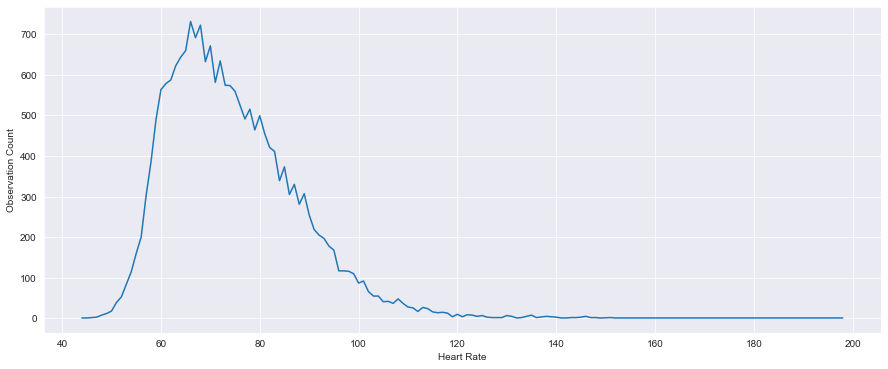

In [8]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.lineplot(data=rate_count, x=rate_count.index, y=rate_count[rate_count.index])
axes.set(xlabel="Heart Rate")
axes.set(ylabel="Observation Count")